# . En tete

# . Introduction

# . Scrapping et Collecte de données

# 0. Packages

In [1]:
import pandas as pd
import numpy as np
import time
import substring
import sklearn
import seaborn as sns
import scipy as stats
import os
import missingno as msno


In [2]:
import matplotlib.pyplot as plt
import codecs
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import unicodedata
import numpy as np
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords


# 1. Préprocessiong

## 1.1  Fusion des données


**Possible Chargement directe de la base de données complète plus bas. Pas besoin d'exécuter cette partie  à l'exception des packages**

In [6]:
PA75_maison=pd.read_csv("DB_PA75_maison.csv") # ok
MS77_maison=pd.read_csv("DB_MS77_maison.csv") # ok
YV78_maison=pd.read_csv("DB_YV78_maison.csv") # ok

ES91_maison=pd.read_csv("DB_ES91_maison.csv") # ok
HS92_maison=pd.read_csv("DB_HS92_maison.csv") # ok 
SSD93_maison=pd.read_csv("DB_SSD93_maison.csv") # ok

VM94_maison=pd.read_csv("DB_VM94_maison.csv") # ok
VO95_maison=pd.read_csv("DB_VO95_maison.csv") # ok


In [7]:
donnees_Ile_De_France = pd.concat([PA75_maison,
                                   MS77_maison,
                                   YV78_maison,
                                   ES91_maison,
                                   HS92_maison,
                                   SSD93_maison,
                                   VM94_maison,
                                   VO95_maison],ignore_index=True)

In [8]:
donnees_Ile_De_France.drop(columns=["Unnamed: 0","Unnamed: 0.1","Prix_sur"],inplace=True)

In [ ]:
BaseGeoAddresse=pd.read_csv("BaseGeoAddresse.csv") # ok

In [ ]:
Code_insee=[]
#Departement=[]
Latitude=[]
Longitude=[]
MinDistGar=[]
MoyDistGar=[]
train=[]
rer=[]
metro=[]
tramway=[]
Distance=[]
DurationPoliceMin=[]
for i in data.Addresse:
    Code_insee.append(int(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["Code_insee"]))
    Latitude.append(float(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["Latitude"]))
    Longitude.append(float(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["Longitude"]))
    MinDistGar.append(float(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["MinDistGar"]))
    MoyDistGar.append(float(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["MoyDistGar"]))
    train.append(int(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["train"]))
    rer.append(int(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["rer"]))
    metro.append(int(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["metro"]))
    tramway.append(int(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["tramway"]))
    Distance.append(float(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["Distance"]))
    DurationPoliceMin.append(float(BaseGeoAddresse[BaseGeoAddresse.Addresse==i]["DurationPoliceMin"]))
    
donnees_Ile_De_France["Code_insee"]=Code_insee
donnees_Ile_De_France["Latitude"]=Latitude
donnees_Ile_De_France["Longitude"]=Longitude
donnees_Ile_De_France["MinDistGar"]=MinDistGar
donnees_Ile_De_France["MoyDistGar"]=MoyDistGar
donnees_Ile_De_France["train"]=train
donnees_Ile_De_France["rer"]=rer
donnees_Ile_De_France["metro"]=metro
donnees_Ile_De_France["tramway"]=tramway
donnees_Ile_De_France["Distance"]=Distance
donnees_Ile_De_France["DurationPoliceMin"]=DurationPoliceMin 

In [10]:
donnees_Ile_De_France

,id_hourse,Addresse,Titre,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Ascenseur,Terrasse,Garage,Reference,Date_publication,Date_modification,Titre_description,Description
0,PA75_0,Paris 13e 75013 (Butte-aux-Cailles),"Achat maison 5 pièces 133 m², Paris 13e - 1 69...",1 695 000 €,133 m²,5 pièces,4 chambres,NaN,NaN,NaN,NaN,NaN,Réf. de l’annonce : 221,Publiée le 27 oct. 2020,Modifiée le 28 oct. 2020,Descriptif de cette maison à vendre de 5 pièce...,Dans un quartier très recherché du 13ème arron...
1,PA75_1,Paris 19e 75019 (Secrétan - Jaurès),"Achat maison 3 pièces 47 m², Paris 19e - 577 5...",577 500 €,"47,03 m²",3 pièces,1 chambre,NaN,NaN,NaN,NaN,NaN,Réf. de l’annonce : 006909E1LWIQ,Publiée il y a plus de 2 mois,Modifiée le 17 nov. 2020,Descriptif de cette maison à vendre de 3 pièce...,Appartement Paris 3 pièce(s) 47.03 m2. AVENUE ...
2,PA75_3,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1 263 000 €,150 m²,6 pièces,4 chambres,NaN,NaN,NaN,1 terrasse,NaN,Réf. de l’annonce : 2990,Publiée le 28 nov. 2020,Modifiée le 5 déc. 2020,Descriptif de cette maison à vendre de 6 pièce...,Vend maison de ville de 6 pièce(s) de 116.01 e...
3,PA75_4,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1 263 000 €,150 m²,6 pièces,4 chambres,NaN,NaN,NaN,1 terrasse,NaN,Réf. de l’annonce : 3001,Publiée le 4 déc. 2020,Modifiée le 5 déc. 2020,Descriptif de cette maison à vendre de 6 pièce...,Vend maison de ville de 6 pièce(s) de 116.01 e...
4,PA75_5,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1 263 000 €,150 m²,6 pièces,4 chambres,NaN,NaN,NaN,1 terrasse,NaN,Réf. de l’annonce : 3002,Publiée le 4 déc. 2020,Modifiée le 5 déc. 2020,Descriptif de cette maison à vendre de 6 pièce...,Vend maison de ville de 6 pièce(s) de 116.01 e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,VO95_1392,Sannois 95110,"Achat maison 10 pièces 360 m², Sannois - 1 470...",1 470 000 €,360 m²,10 pièces,NaN,NaN,Jardin,NaN,NaN,NaN,Réf. de l’annonce : 2089,Publiée le 15 oct. 2020,Modifiée le 3 déc. 2020,Descriptif de cette maison à vendre de 10 pièc...,Sannois Centre-ville. Seulement chez TLM Immob...
8365,VO95_1398,Cergy 95000,"Achat maison 5 pièces 100 m², Cergy - 209 500 €",209 500 €,"100,02 m²",5 pièces,2 chambres,5 places de parking,Jardin,NaN,NaN,NaN,Réf. de l’annonce : 628,Publiée il y a plus de 2 mois,Modifiée le 15 nov. 2020,Descriptif de cette maison à vendre de 5 pièce...,"A 50 min de Rouen, 45min de Beauvais et 9min d..."
8366,VO95_1399,Fosses 95470,"Achat maison 5 pièces 100 m², Fosses - 253 000 €",253 000 €,100 m²,5 pièces,4 chambres,1 place de parking,NaN,NaN,Terrasse,1 garage,NaN,Publiée il y a plus de 2 mois,Réf. de l’annonce : 33397DHI724,Descriptif de cette maison à vendre de 5 pièce...,MAISON 5 PIECES 4 CHAMBRES. L'agence HOUSE IMM...
8367,VO95_1400,Chaussy 95710,"Achat maison 5 pièces 95 m², Chaussy - 169 600 €",169 600 €,95 m²,5 pièces,3 chambres,NaN,Jardin,NaN,NaN,NaN,NaN,Publiée il y a plus de 2 mois,Réf. de l’annonce : 361273,Descriptif de cette maison à vendre de 5 pièce...,Maison de 5 pièces. Charmante maison de villag...


 **Chargement directe de la base de données complète. Pas besoin d'exécuter la partie du dessus à l'exception des packages**

In [36]:
donnees_Ile_De_France=pd.read_csv("DataBase.csv")

## 1.2  Nettoyage de la base de données

In [37]:
# Extracteur de Département 
def depExtracteur(text):
    res=""
    if(text[:2]=="ES"):
        res= "91"
    elif(text[:2]=="VO"):
        res= "95"
    elif(text[:2]=="YV"):
        res= "78"
    elif(text[:2]=="SM"):
        res= "77"
    elif(text[:2]=="VM"):
        res= "94"
    elif(text[:2]=="HS"):
        res= "92"
    elif(text[:2]=="PA"):
        res= "75"
    else:
        res="93"
    return res

In [38]:
def Clean(data):
    # Copie de la data
    donnee=data
    
    # Prix
    donnee["Prix"]=donnee.Prix.str.replace("€","").str.replace(" ","")
    donnee["Prix"]=donnee['Prix'].astype(float)

    ## Surface
    donnee['Surface']=donnee.Surface.str.replace("m²","").str.replace(",",".")
    donnee['Surface']=donnee.Surface.astype(float)

    ## Pieces
    donnee['Nb_piece']=donnee.Nb_piece.str.replace("pièce","").str.replace("s","").str.replace(" ","")
    donnee["Nb_piece"]=donnee.Nb_piece.astype(float)

    ### Chambres
    donnee['Nb_chambre']=donnee.Nb_chambre.str.replace("chambre","").str.replace("s","").str.replace(" ","")
    donnee["Nb_chambre"]=donnee.Nb_chambre.astype(float)

    ### Adresse  et  Zone: Emplacement( Ville, Commune, Je ne sais pas trop)

    ## Exemple Asnières-sur-Seine 92600 (Coubertin)
    #   DepartR= 92600    ZoneR = "Asnières-sur-Seine" 
    #   EmplacementR = "(Coubertin)"

    # Departement
    donnee["DepartPrecis"]=[''.join([i for i in j if i.isdigit()]) for j in donnee.Addresse]
    donnee["DepartPrecis"]=donnee["DepartPrecis"].str[-5:]
    #dep=[int(i) for i in dep]
    #donnee["DepartPrecis"]=dep
    
    # Departement
    
    donnee["Departement"]=  donnee.id_hourse.apply(depExtracteur)
    #donnee["Departement"]=donnee.id_hourse.apply(lambda: )
    #data.id_hourse.apply(depExtracteur).value_counts() 


    # ZoneR
    secteur=[''.join([i for i in j if not i.isdigit()]) for j in donnee.Addresse]
    donnee["Zone"]=secteur


    ##  Emplacement exact( Précisé entre Parenthèses)
    
    donnee["Emplacement"]=[substring.substringByChar(i, startChar="(", endChar=")").replace('(','').replace(')','') if i.find('(')>=0 else i for i in donnee.Zone]
    
    ### Parking
    park=donnee.Parking.fillna('')
    park.replace('',np.nan)
    park=[''.join([i for i in j if i.isdigit()]) for j in park]
    park=[0 if i=='' else float(i) for i in park]
    donnee["Parking"]=park
    
    ### Garage
    gar=data.Garage.fillna('')
    gar.replace('',np.nan)
    gar=[''.join([i for i in j if i.isdigit()]) for j in gar]
    gar=[0 if i=='' else int(i) for i in gar]
    donnee["Garage"]=gar
    
    ### Terrasse
    ter=data.Terrasse.fillna('')
    ter=ter.str.replace('errasse','').str.replace('T','').str.replace('t','').str.replace('s','').str.replace(' ','')
    ter=[0 if i=='' else int(i) for i in ter]
    donnee["Terrasse"]=ter
    


    ## Jardin 
    j=~donnee.Jardin.isna()
    j=[1 if i==True else 0 for i in j]
    donnee['Jardin']=j
    

    ### Ascenseur : Inutile visuellement Ne contient que les Na/ En meme tps
    # Les maisons n'ont pas d'ascenseur
    return donnee

In [39]:
## Rque: Trans former département

In [40]:
data=Clean(donnees_Ile_De_France)

In [41]:
data

,id_hourse,Addresse,Titre,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Ascenseur,...,train,rer,metro,tramway,Distance,DurationPoliceMin,DepartPrecis,Departement,Zone,Emplacement
0,PA75_0,Paris 13e 75013 (Butte-aux-Cailles),"Achat maison 5 pièces 133 m², Paris 13e - 1 69...",1695000.0,133.00,5.0,4.0,0.0,0,NaN,...,0,0,1,0,0.868479,0.069722,75013,75,Paris e (Butte-aux-Cailles),Butte-aux-Cailles
1,PA75_1,Paris 19e 75019 (Secrétan - Jaurès),"Achat maison 3 pièces 47 m², Paris 19e - 577 5...",577500.0,47.03,3.0,1.0,0.0,0,NaN,...,0,0,1,0,1.113978,0.096667,75019,75,Paris e (Secrétan - Jaurès),Secrétan - Jaurès
2,PA75_3,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1263000.0,150.00,6.0,4.0,0.0,0,NaN,...,0,0,1,1,1.459752,0.169167,75019,75,Paris e (Porte de la Villette),Porte de la Villette
3,PA75_4,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1263000.0,150.00,6.0,4.0,0.0,0,NaN,...,0,0,1,1,1.459752,0.169167,75019,75,Paris e (Porte de la Villette),Porte de la Villette
4,PA75_5,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1263000.0,150.00,6.0,4.0,0.0,0,NaN,...,0,0,1,1,1.459752,0.169167,75019,75,Paris e (Porte de la Villette),Porte de la Villette
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,VO95_1392,Sannois 95110,"Achat maison 10 pièces 360 m², Sannois - 1 470...",1470000.0,360.00,10.0,NaN,0.0,1,NaN,...,1,0,0,0,2.126950,0.132778,95110,95,Sannois,Sannois
8365,VO95_1398,Cergy 95000,"Achat maison 5 pièces 100 m², Cergy - 209 500 €",209500.0,100.02,5.0,2.0,5.0,1,NaN,...,1,1,0,0,3.735724,0.127500,95000,95,Cergy,Cergy
8366,VO95_1399,Fosses 95470,"Achat maison 5 pièces 100 m², Fosses - 253 000 €",253000.0,100.00,5.0,4.0,1.0,0,NaN,...,0,1,0,0,8.954398,0.330000,95470,95,Fosses,Fosses
8367,VO95_1400,Chaussy 95710,"Achat maison 5 pièces 95 m², Chaussy - 169 600 €",169600.0,95.00,5.0,3.0,0.0,1,NaN,...,1,0,0,0,26.672342,0.508889,95710,95,Chaussy,Chaussy


In [42]:
## IMPORTATION DE LA BASE PROPRE

# 2. Etudes descriptives

## 2.1  Présentation de la base de données

In [43]:
donnee=data
donnee.columns

Index(['id_hourse', 'Addresse', 'Titre', 'Prix', 'Surface', 'Nb_piece',
       'Nb_chambre', 'Parking', 'Jardin', 'Ascenseur', 'Terrasse', 'Garage',
       'Reference', 'Date_publication', 'Date_modification',
       'Titre_description', 'Description', 'Code_insee', 'Latitude',
       'Longitude', 'MinDistGar', 'MoyDistGar', 'train', 'rer', 'metro',
       'tramway', 'Distance', 'DurationPoliceMin', 'DepartPrecis',
       'Departement', 'Zone', 'Emplacement'],
      dtype='object')

In [44]:
donnee.shape

(8369, 32)

In [45]:
donnee.dtypes

id_hourse             object
Addresse              object
Titre                 object
Prix                 float64
Surface              float64
Nb_piece             float64
Nb_chambre           float64
Parking              float64
Jardin                 int64
Ascenseur            float64
Terrasse               int64
Garage                 int64
Reference             object
Date_publication      object
Date_modification     object
Titre_description     object
Description           object
Code_insee             int64
Latitude             float64
Longitude            float64
MinDistGar           float64
MoyDistGar           float64
train                  int64
rer                    int64
metro                  int64
tramway                int64
Distance             float64
DurationPoliceMin    float64
DepartPrecis          object
Departement           object
Zone                  object
Emplacement           object
dtype: object

## 2.2  Données Manquantes

In [46]:
%matplotlib inline

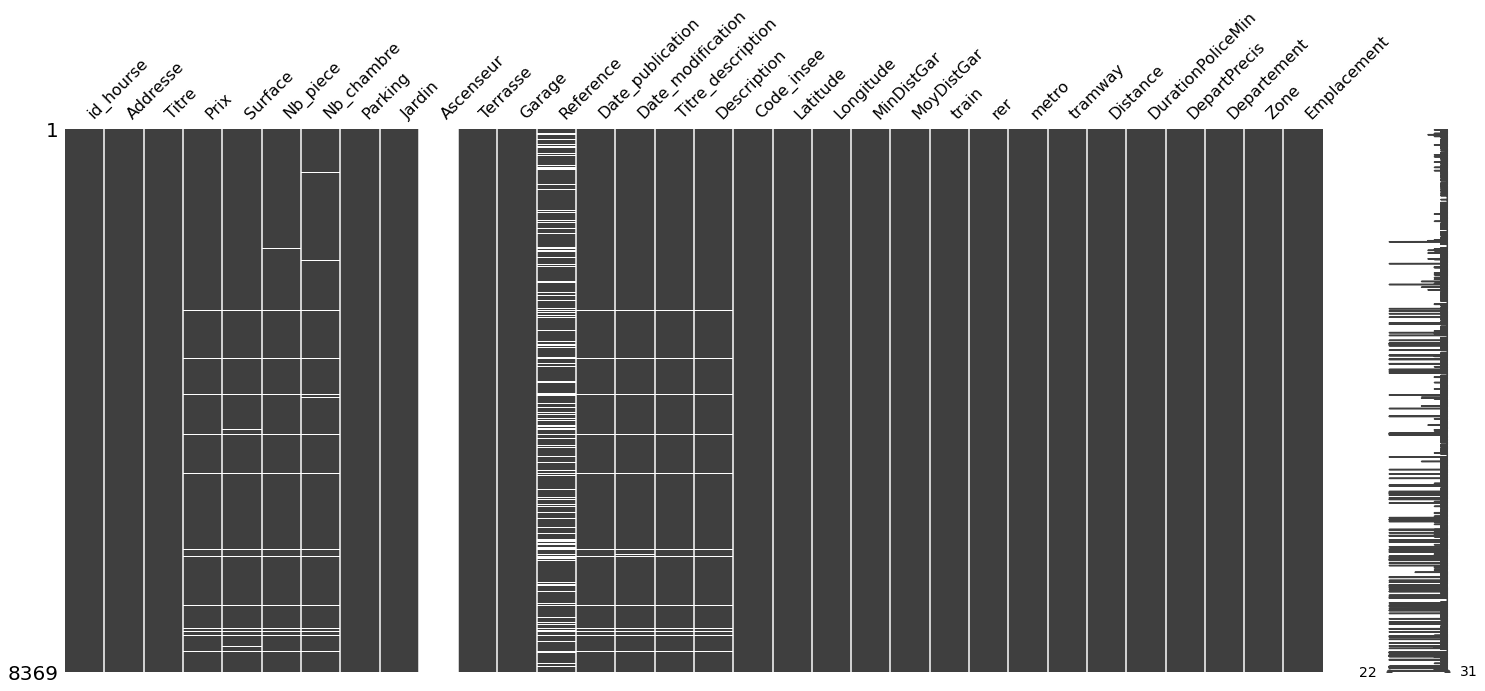

In [47]:
msno.matrix(donnee)

 Les maisons n'ont visiblement pas d'ascenseur, Variable inutile 
 Les références des annonces ne sont d'aucune utilité aussi

In [48]:
donnee.drop(columns=["Ascenseur","Reference"],inplace=True)

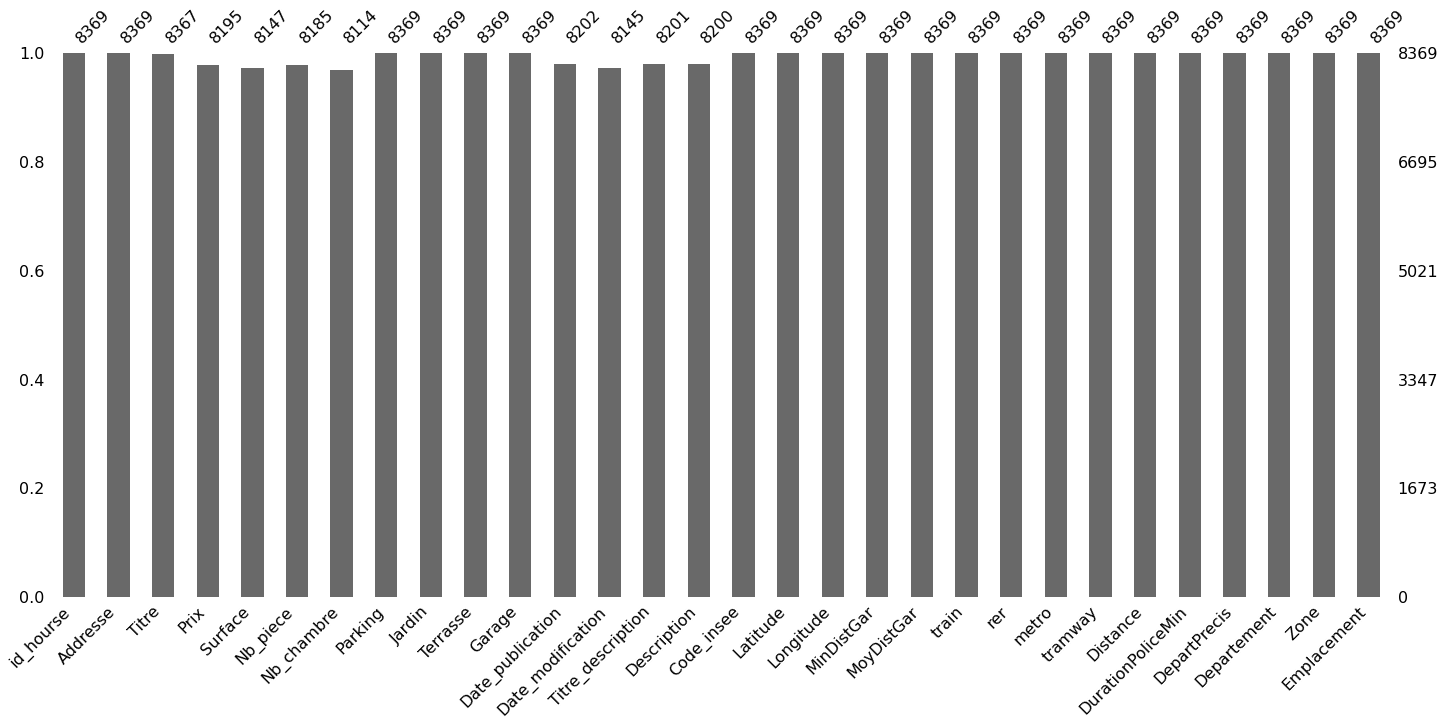

In [49]:
msno.bar(donnee)

In [50]:
donnee.isna().sum()/donnee.shape[0]*100

id_hourse            0.000000
Addresse             0.000000
Titre                0.023898
Prix                 2.079101
Surface              2.652647
Nb_piece             2.198590
Nb_chambre           3.046959
Parking              0.000000
Jardin               0.000000
Terrasse             0.000000
Garage               0.000000
Date_publication     1.995459
Date_modification    2.676544
Titre_description    2.007408
Description          2.019357
Code_insee           0.000000
Latitude             0.000000
Longitude            0.000000
MinDistGar           0.000000
MoyDistGar           0.000000
train                0.000000
rer                  0.000000
metro                0.000000
tramway              0.000000
Distance             0.000000
DurationPoliceMin    0.000000
DepartPrecis         0.000000
Departement          0.000000
Zone                 0.000000
Emplacement          0.000000
dtype: float64

 Notre base de donnéees contient très peu de données manquantes. Environ 3%. 
Notre stratégie pour le traitement des données manquantes dans cette situation 
 pour gangner en temps est la suppression des données manquantes 

In [51]:
donnee.shape

(8369, 30)

In [52]:
donnee.dropna().shape

(8023, 30)

In [53]:
donnee=donnee.dropna()

In [55]:
donnee["Nb_chambre"]=donnee["Nb_chambre"].astype(int)
donnee["Nb_piece"]=donnee["Nb_piece"].astype(int)
donnee["Terrasse"]=donnee["Terrasse"].astype(int)
donnee["Garage"]=donnee["Garage"].astype(int)
donnee["Parking"]=donnee["Parking"].astype(int)


C:\Users\ALI ZATCHI Afzal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ALI ZATCHI Afzal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ALI ZATCHI Afzal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [56]:
donnee

,id_hourse,Addresse,Titre,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Terrasse,...,train,rer,metro,tramway,Distance,DurationPoliceMin,DepartPrecis,Departement,Zone,Emplacement
0,PA75_0,Paris 13e 75013 (Butte-aux-Cailles),"Achat maison 5 pièces 133 m², Paris 13e - 1 69...",1695000.0,133.00,5,4,0,0,0,...,0,0,1,0,0.868479,0.069722,75013,75,Paris e (Butte-aux-Cailles),Butte-aux-Cailles
1,PA75_1,Paris 19e 75019 (Secrétan - Jaurès),"Achat maison 3 pièces 47 m², Paris 19e - 577 5...",577500.0,47.03,3,1,0,0,0,...,0,0,1,0,1.113978,0.096667,75019,75,Paris e (Secrétan - Jaurès),Secrétan - Jaurès
2,PA75_3,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1263000.0,150.00,6,4,0,0,1,...,0,0,1,1,1.459752,0.169167,75019,75,Paris e (Porte de la Villette),Porte de la Villette
3,PA75_4,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1263000.0,150.00,6,4,0,0,1,...,0,0,1,1,1.459752,0.169167,75019,75,Paris e (Porte de la Villette),Porte de la Villette
4,PA75_5,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1263000.0,150.00,6,4,0,0,1,...,0,0,1,1,1.459752,0.169167,75019,75,Paris e (Porte de la Villette),Porte de la Villette
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,VO95_1389,Goussainville 95190,"Achat maison 5 pièces 76 m², Goussainville - 2...",284000.0,76.00,5,3,0,1,0,...,0,1,0,0,1.573348,0.066944,95190,95,Goussainville,Goussainville
8363,VO95_1391,Vétheuil 95510,"Achat maison 3 pièces 60 m², Vétheuil - 202 000 €",202000.0,60.00,3,2,0,1,0,...,1,0,0,0,24.035142,0.591111,95510,95,Vétheuil,Vétheuil
8365,VO95_1398,Cergy 95000,"Achat maison 5 pièces 100 m², Cergy - 209 500 €",209500.0,100.02,5,2,5,1,0,...,1,1,0,0,3.735724,0.127500,95000,95,Cergy,Cergy
8366,VO95_1399,Fosses 95470,"Achat maison 5 pièces 100 m², Fosses - 253 000 €",253000.0,100.00,5,4,1,0,0,...,0,1,0,0,8.954398,0.330000,95470,95,Fosses,Fosses


## 2.3 ANALYSE UNIVARIEE

### a. Variables qualitatives

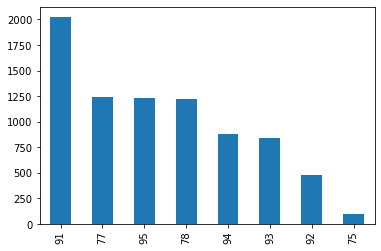

In [58]:
donnee.Departement.value_counts().plot.bar()

**Paris comporte très peu de maisons en vente par rapport aux autres départements.
L'éssonne est le département qui contient le plus de maison à vendre selon notre base de données**

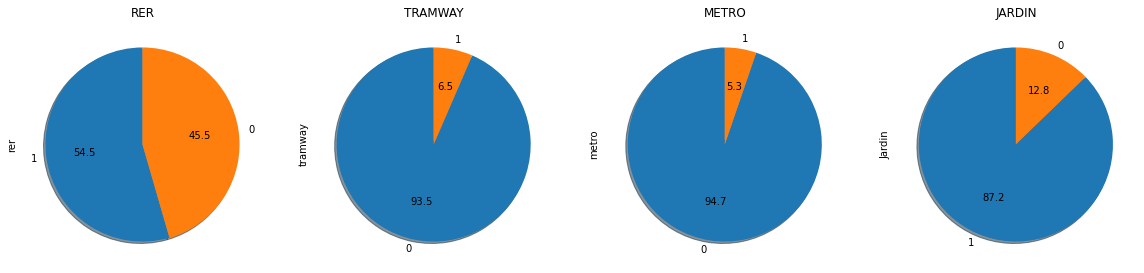

In [94]:
plt.figure(figsize=(20,10))

plt.subplot(1, 4, 1)
donnee.rer.value_counts().plot.pie(shadow=True,startangle=90,autopct='%.1f')
plt.title('RER')
#plt.ylabel('Damped oscillation')

plt.subplot(1, 4, 2)
donnee.tramway.value_counts().plot.pie(shadow=True,startangle=90,autopct='%.1f')
plt.title('TRAMWAY')

plt.subplot(1, 4, 3)
donnee.metro.value_counts().plot.pie(shadow=True,startangle=90,autopct='%.1f')
plt.title('METRO')

plt.subplot(1, 4, 4)
donnee.Jardin.value_counts().plot.pie(shadow=True,startangle=90,autopct='%.1f')
plt.title('JARDIN')


plt.show()

- **`Environ 12% des maisons répertoriées n'ont pas de Jardins.`**
- **`Seulement 5,3% des maisons ne sont pas à proximité d'une station de métro et 6,5% pour les stations de train.`**
- **`54,5% des maisons sont à proximité des gar de RER.`**


In [67]:
donnee.columns

Index(['id_hourse', 'Addresse', 'Titre', 'Prix', 'Surface', 'Nb_piece',
       'Nb_chambre', 'Parking', 'Jardin', 'Terrasse', 'Garage',
       'Date_publication', 'Date_modification', 'Titre_description',
       'Description', 'Code_insee', 'Latitude', 'Longitude', 'MinDistGar',
       'MoyDistGar', 'train', 'rer', 'metro', 'tramway', 'Distance',
       'DurationPoliceMin', 'DepartPrecis', 'Departement', 'Zone',
       'Emplacement'],
      dtype='object')

**Dans cette partie, nous optons pour un nuage de mots les plus réprésentatifs de la description. Pour ce faire, nous utilisons le "wordcloud", mais à la différence que nous faisons un pré-nettoyage de texte avant d'utilser la méthode worldcloud afin d'optimiser et d'avoir un texte plus propre.**

In [62]:
### Elements mis en avant dans la description d'une Maison sur le site Bienici

In [63]:
fsw=stopwords.words('french')
fsw=(fsw + ['tout',"c'est",'toute','point','sous',"a",'tant','donc','très',"tres",'sans','celle','cette','les','là','ni','ceux','celles','beaucoup','pourquoi','autres','autre','certains','ainsi','aussi','tous','cela'])

pattern=['[^!.,;:{}?]+']

def remove_punctuation(pattern,phrase):
    for pat in pattern:
        return(re.findall(pat,phrase))
        #return('\n')
def enlever_accents(text):
    try:
        text = unicode(text, "utf-8")
    except (TypeError, NameError):
        text = unicodedata.normalize('NFD', text)
        text = text.encode('ascii', 'ignore')
        text = text.decode("utf-8")
    return str(text)

def show_wordcloud(text, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=fsw,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(text)
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

def traitement(texte):
    texte= "".join(remove_punctuation(pattern,texte))
    texte=texte.lower().replace('\n','')
    texte=enlever_accents(texte)
    show_wordcloud(texte)

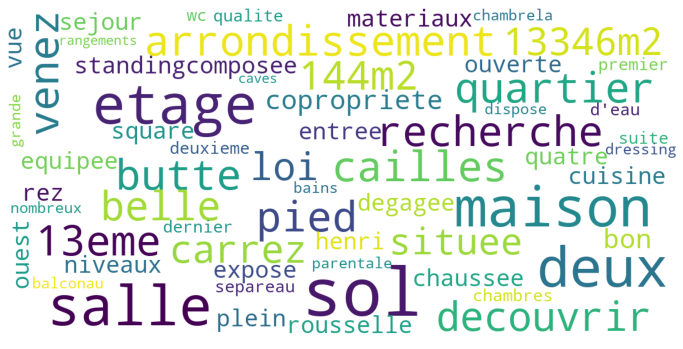

In [64]:
traitement(donnee.Description[0])

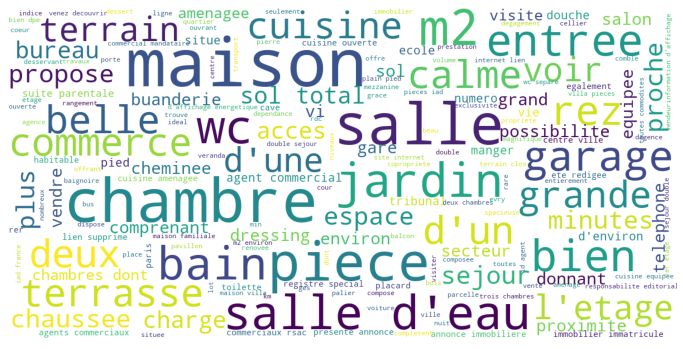

In [65]:
echantillon=donnee.Description.sample(100)
desc=""
for i in echantillon:
    desc+=i
traitement(desc)

**`En prenant un échantillon de 100 maisons, nous obtenons ce nuage de mots. Pour décrire une maison, le jardin, terrasse, nombre de pieces, de chambres, le terrain, le garage, la surface, la proximité de la gar... sont les critères qui reviennent souvent.`** 

### b. Variables quantitatives

In [95]:
donnee.describe().round(1)

,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Terrasse,Garage,Code_insee,Latitude,Longitude,MinDistGar,MoyDistGar,train,rer,metro,tramway,Distance,DurationPoliceMin
count,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0,8023.0
mean,569682.8,146.4,6.0,3.8,1.2,0.9,0.2,0.1,88225.1,48.8,2.4,3.9,37.0,0.4,0.5,0.1,0.1,6.6,0.2
std,569232.9,81.8,2.8,1.4,2.1,0.3,0.6,0.3,7295.0,0.5,0.6,62.8,66.1,0.5,0.5,0.2,0.2,65.9,1.1
min,25966.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,75000.0,5.3,-4.1,0.0,18.5,0.0,0.0,0.0,0.0,0.0,0.0
25%,311112.5,95.0,5.0,3.0,0.0,1.0,0.0,0.0,78480.0,48.7,2.2,0.6,24.8,0.0,0.0,0.0,0.0,1.1,0.1
50%,430000.0,128.0,6.0,4.0,0.0,1.0,0.0,0.0,91560.0,48.8,2.4,1.1,30.5,0.0,1.0,0.0,0.0,2.2,0.1
75%,648000.0,171.0,7.0,5.0,2.0,1.0,0.0,0.0,94100.0,48.9,2.5,2.3,41.2,1.0,1.0,0.0,0.0,5.8,0.2
max,16000000.0,990.0,166.0,30.0,99.0,1.0,20.0,6.0,95880.0,49.6,18.7,4763.1,4858.1,1.0,1.0,1.0,1.0,4857.9,85.5


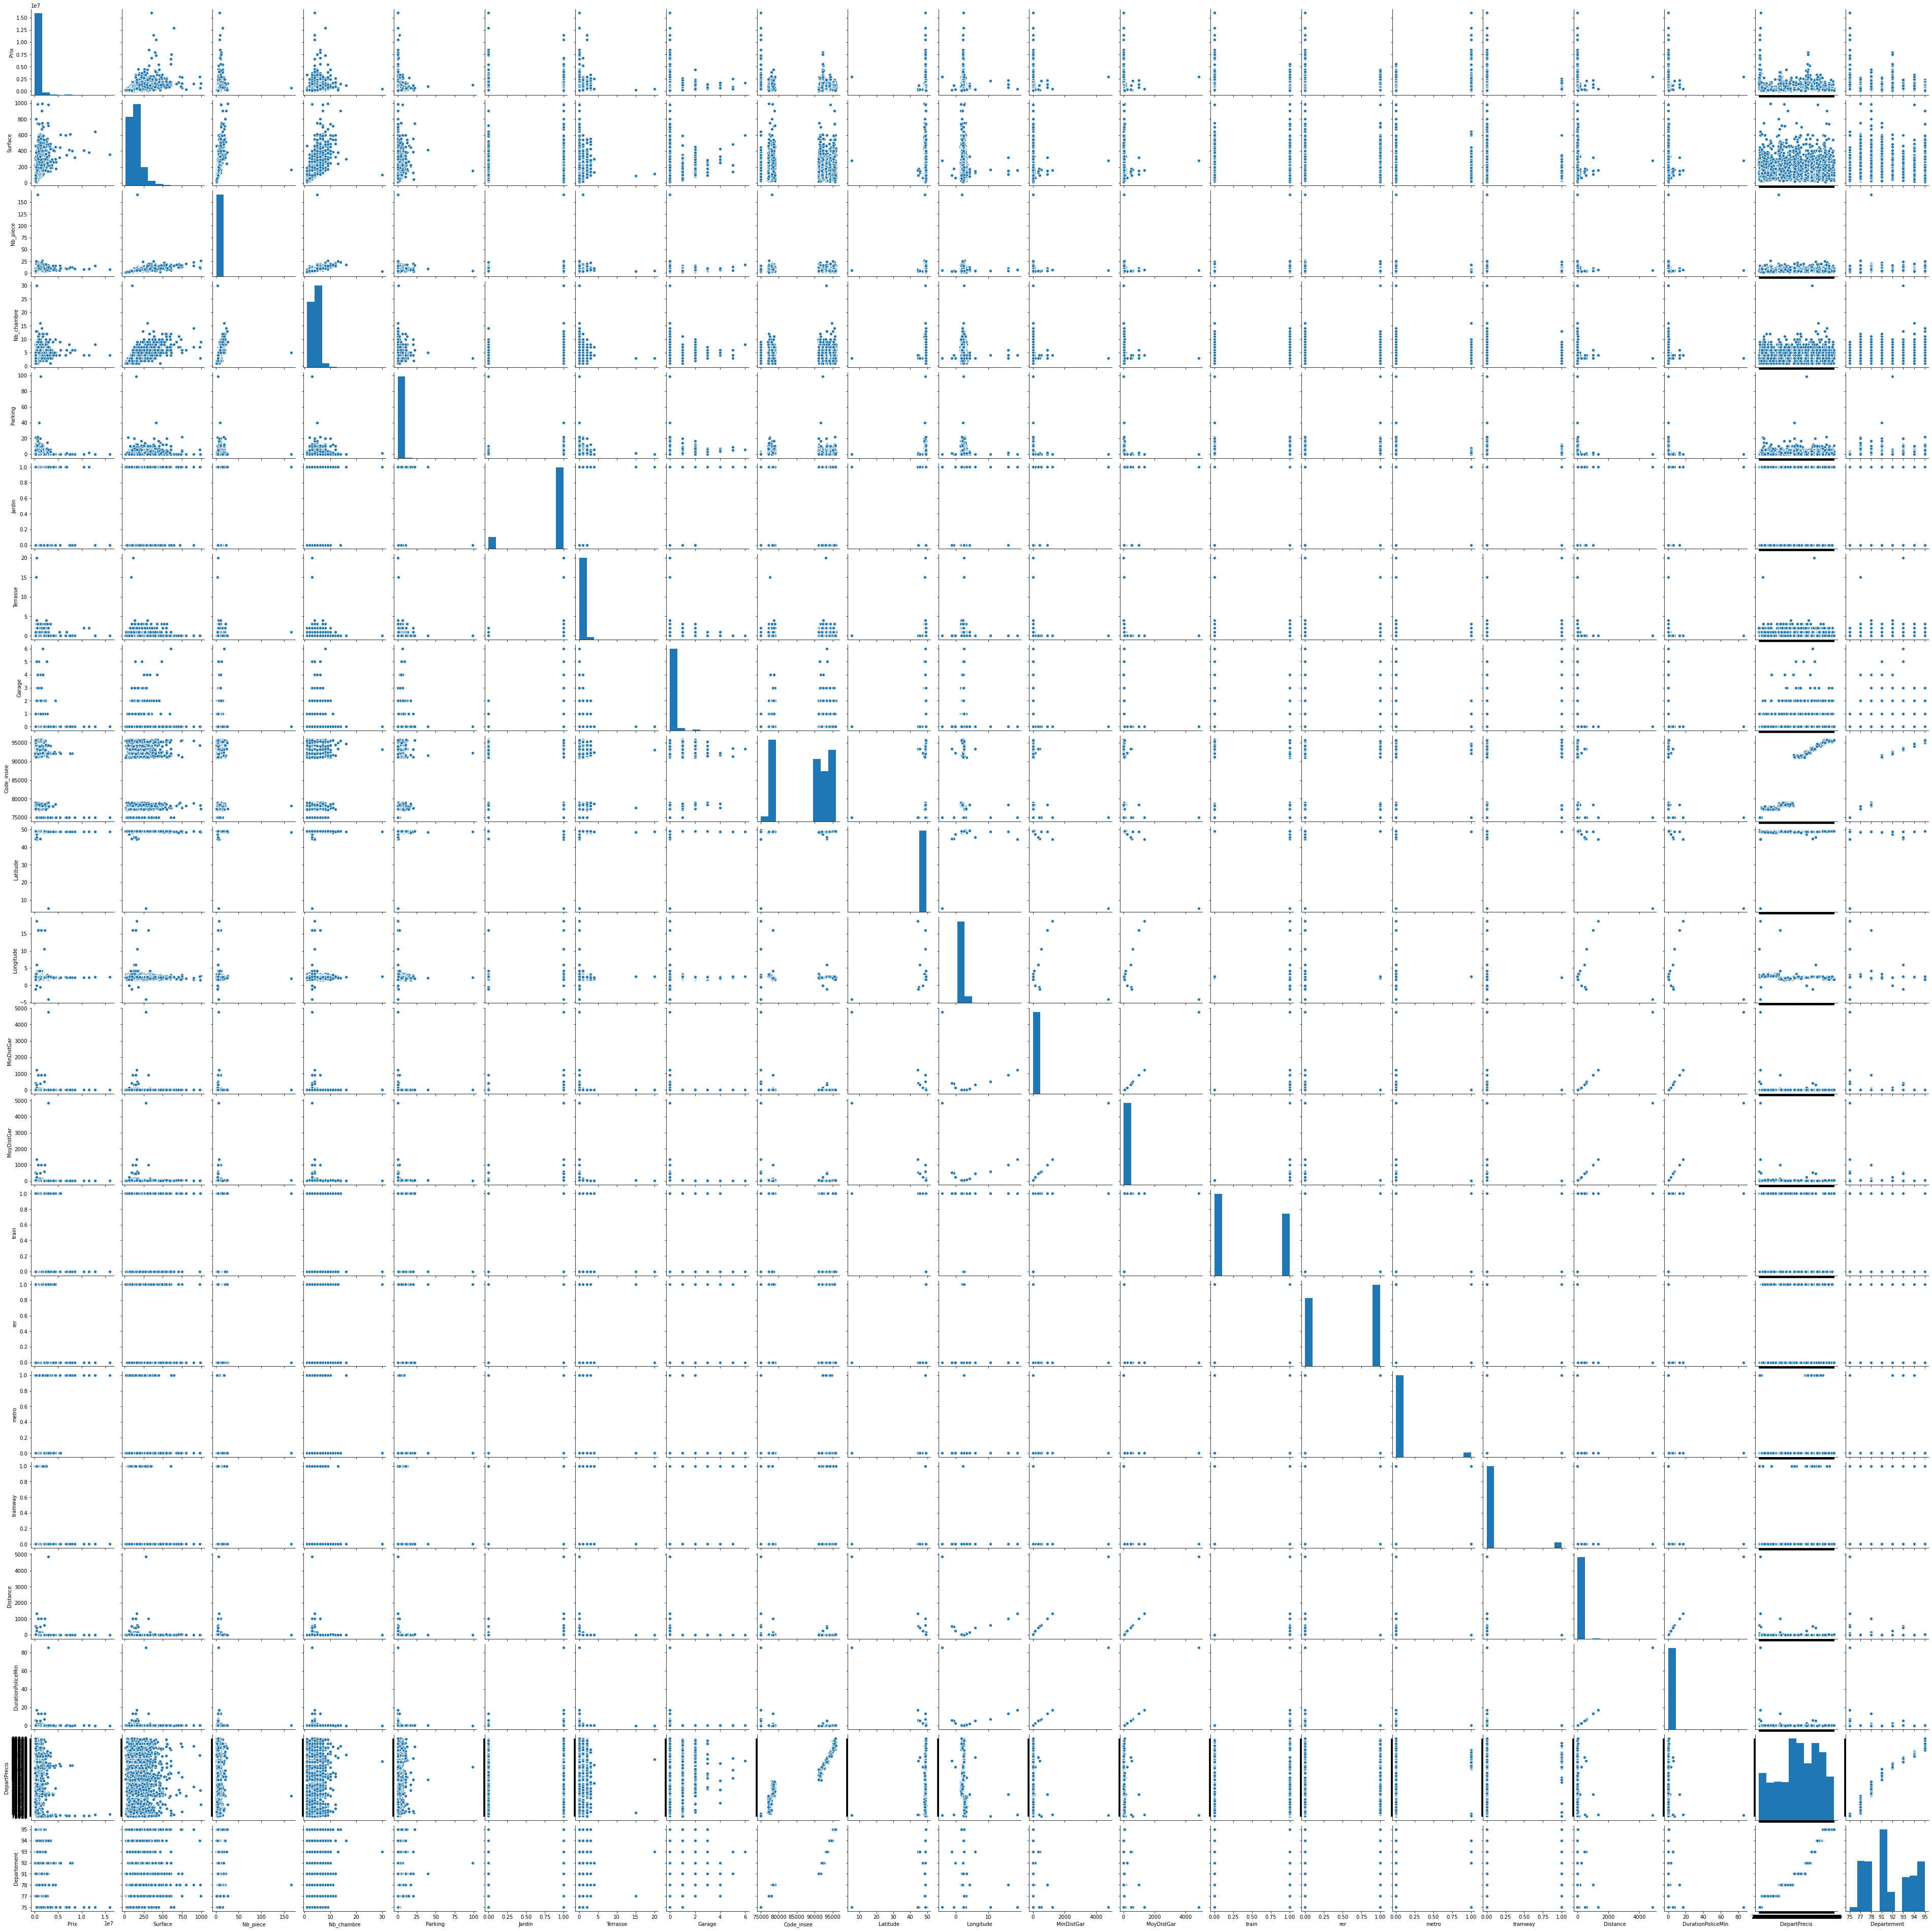

In [96]:
sns.pairplot(donnee)

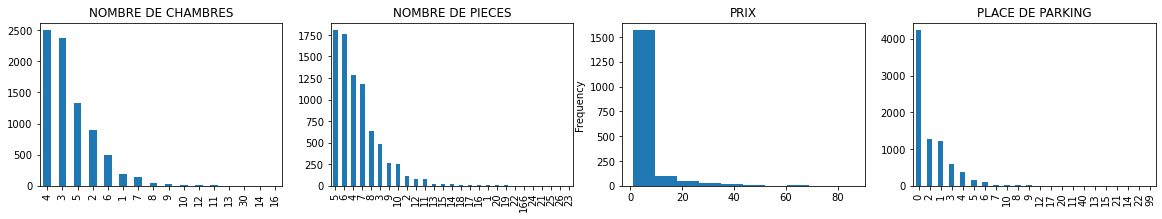

In [100]:
plt.figure(figsize=(20,3))

plt.subplot(1, 4, 1)
donnee.Nb_chambre.value_counts().plot.bar()
plt.title('NOMBRE DE CHAMBRES')
#plt.ylabel('Damped oscillation')

plt.subplot(1, 4, 2)
donnee.Nb_piece.value_counts().plot.bar()
plt.title('NOMBRE DE PIECES')

plt.subplot(1, 4, 3)
donnee.Prix.value_counts().plot.hist()
plt.title('PRIX')

plt.subplot(1, 4, 4)
donnee.Parking.value_counts().plot.bar()
plt.title('PLACE DE PARKING')

plt.show()

In [106]:
donnee[["MinDistGar","MoyDistGar","Distance","DurationPoliceMin"]].describe()

,MinDistGar,MoyDistGar,Distance,DurationPoliceMin
count,8023.000000,8023.000000,8023.000000,8023.000000
mean,3.858058,36.984163,6.555310,0.196288
std,62.777862,66.074677,65.919042,1.065762
min,0.001876,18.501617,0.019306,0.000000
25%,0.597504,24.805062,1.148232,0.089722
50%,1.125482,30.528469,2.249745,0.142778
75%,2.343947,41.226401,5.795271,0.222500
max,4763.127226,4858.128855,4857.874085,85.473333


- **` Dans l'Ile de France et selon les données que nous disposons, le prix moyen d'une maison est de 569 683 €.
pour en moyenne 146.38m², 6 pièces et 4 chambres.  `**

- **` 50% des maisons sont à    `**

- **` hambres.  `**



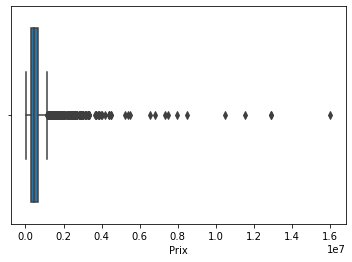

In [43]:
#donnee.Prix.apply(np.log).hist()
sns.boxplot(donnee.Prix)

Les données étant dispersées, nous optons pour une tranformation logarithmique de la variable Prix

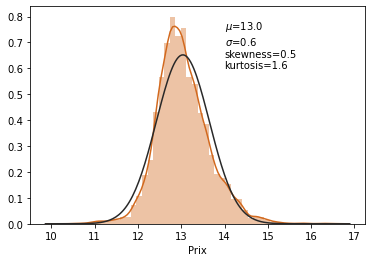

In [109]:
import scipy
(mu, sigma) = scipy.stats.norm.fit(donnee.Prix.apply(np.log))
sns.distplot(donnee.Prix.apply(np.log),fit=scipy.stats.norm,color='chocolate')
skew=donnee.Prix.apply(np.log).skew()
kurt=donnee.Prix.apply(np.log).kurt()
plt.text(14,0.6,'$\mu$='+str(round(mu,1))+'\n'+
         '$\sigma$='+str(round(sigma,1))+'\n'+
         'skewness='+str(round(skew,1))+'\n'+
         'kurtosis='+str(round(kurt,1))
        )
plt.show()

In [110]:
from scipy.stats import jarque_bera, stats, shapiro

In [111]:
import scipy
import pylab

In [112]:
stat,p=jarque_bera(donnee.Prix.apply(np.log))

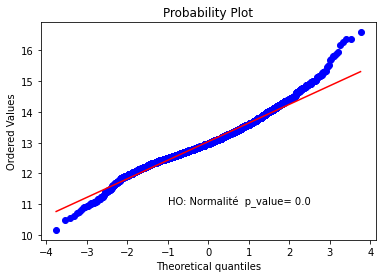

In [113]:
scipy.stats.probplot(donnee.Prix.apply(np.log),dist='norm',plot=plt)
plt.text(-1,11,"HO: Normalité  p_value= "+str(p))
plt.show()

La transformation logarithmique ne donnee pas la normalité non plus.

## 2.4 ANALYSE BIVARIEE

In [114]:
## Etudes par département des maisons

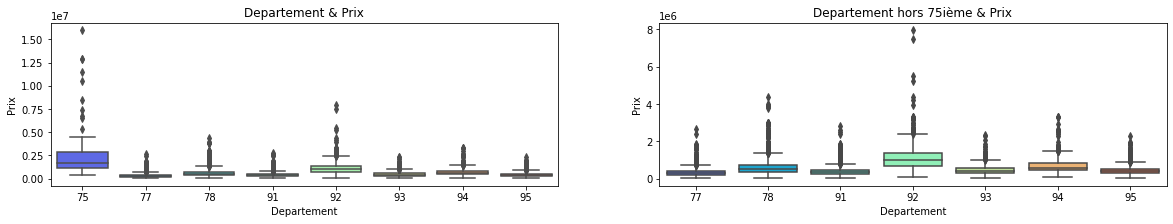

In [132]:
plt.figure(figsize=(20,3))

plt.subplot(1, 2, 1)
sns.boxplot(x='Departement',y='Prix',data=donnee,palette='rainbow')
plt.title('Departement & Prix')
#plt.ylabel('Damped oscillation')

plt.subplot(1, 2, 2)
sns.boxplot(x='Departement',y='Prix',data=donnee[donnee.Departement!='75'],palette='rainbow')
plt.title('Departement hors 75ième & Prix')

plt.show()

- **` Les maisons sont en moyenne beaucoup plus chères à Paris que dans les autres départements. Aussi, les prix des appartements à Paris sont très dispersés, un peu moins dans les autres département de l'Ile de France.  `**

- **` Au sein des autres départements, c'est dans le 92ième qu'on trouve les maisons les plus chères après Paris. `**

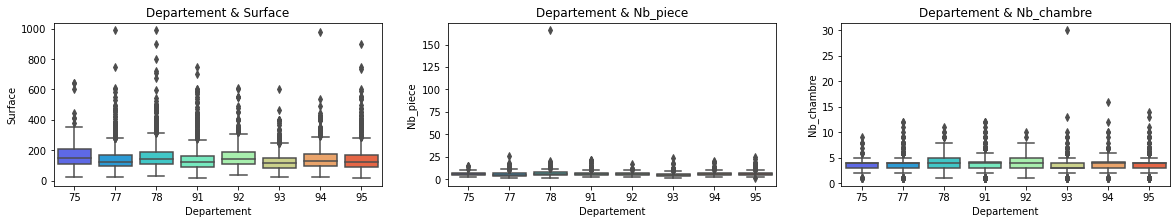

In [135]:
plt.figure(figsize=(20,3))

plt.subplot(1, 3, 1)
sns.boxplot(x='Departement',y='Surface',data=donnee,palette='rainbow')
plt.title('Departement & Surface')

plt.subplot(1, 3, 2)
sns.boxplot(x='Departement',y='Nb_piece',data=donnee,palette='rainbow')
plt.title('Departement & Nb_piece')

plt.subplot(1, 3, 3)
sns.boxplot(x='Departement',y='Nb_chambre',data=donnee,palette='rainbow')
plt.title('Departement & Nb_chambre')

plt.show()

 **` L'analyse visuelle du graphique précédent permet de dire que les maisons ont en moyenne les memes répartitions de surfaces, de nombre de pièces, de nombre de chambres dans l'Ile de France.  `**

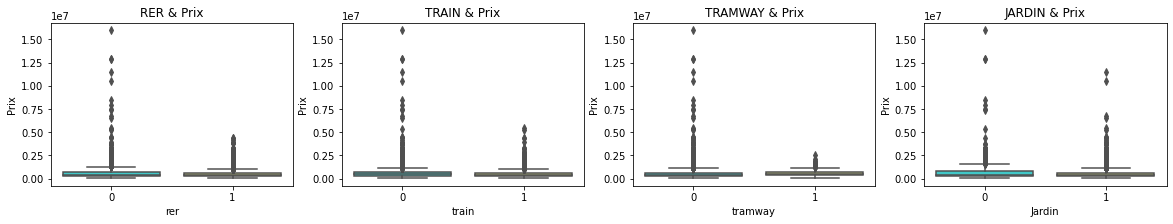

In [130]:
plt.figure(figsize=(20,3))

plt.subplot(1, 4, 1)
sns.boxplot(x='rer',y='Prix',data=donnee,palette='rainbow')
plt.title('RER & Prix')
#plt.ylabel('Damped oscillation')

plt.subplot(1, 4, 2)
sns.boxplot(x='train',y='Prix',data=donnee,palette='rainbow')
plt.title('TRAIN & Prix')

plt.subplot(1, 4, 3)
sns.boxplot(x='tramway',y='Prix',data=donnee,palette='rainbow')
plt.title('TRAMWAY & Prix')

plt.subplot(1, 4, 4)
sns.boxplot(x='Jardin',y='Prix',data=donnee,palette='rainbow')
plt.title('JARDIN & Prix')

plt.show()

In [ ]:
On peut accepter l'hyposthèse alternative que la tarification des maison est fonction de la proximité du rer.

In [136]:
print("Test RER & Prix: -------- ",scipy.stats.ttest_ind(donnee.Prix[donnee.rer==1],donnee.Prix[donnee.rer==0]))
print("Test TRAIN & Prix: -------- ",scipy.stats.ttest_ind(donnee.Prix[donnee.train==1],donnee.Prix[donnee.train==0]))
print("Test TRAMWAY & Prix: -------- ",scipy.stats.ttest_ind(donnee.Prix[donnee.tramway==1],donnee.Prix[donnee.tramway==0]))
print("Test JARDIN & Prix: -------- ",scipy.stats.ttest_ind(donnee.Prix[donnee.Jardin==1],donnee.Prix[donnee.Jardin==0]))

Test RER & Prix: --------  Ttest_indResult(statistic=-5.513865757812498, pvalue=3.619455693677526e-08)
Test TRAIN & Prix: --------  Ttest_indResult(statistic=-8.279294441927805, pvalue=1.4393752698764254e-16)
Test TRAMWAY & Prix: --------  Ttest_indResult(statistic=0.1692670670869888, pvalue=0.8655908472118463)
Test JARDIN & Prix: --------  Ttest_indResult(statistic=-8.202215692645922, pvalue=2.7266705846325334e-16)


 - **` On peut accepter à 99% que la tarification des maisons dépend de la proximité du RER, du TRAIN et aussi de la disposition ou non d'un jardin  `**
 - **` Par contre, la proximité des maisons des Tramway ne discrimine pas la tarification des maisons selon notre donnée.  `**

## 2.4 Multivariate analysis

### a. Matrice de correlations 

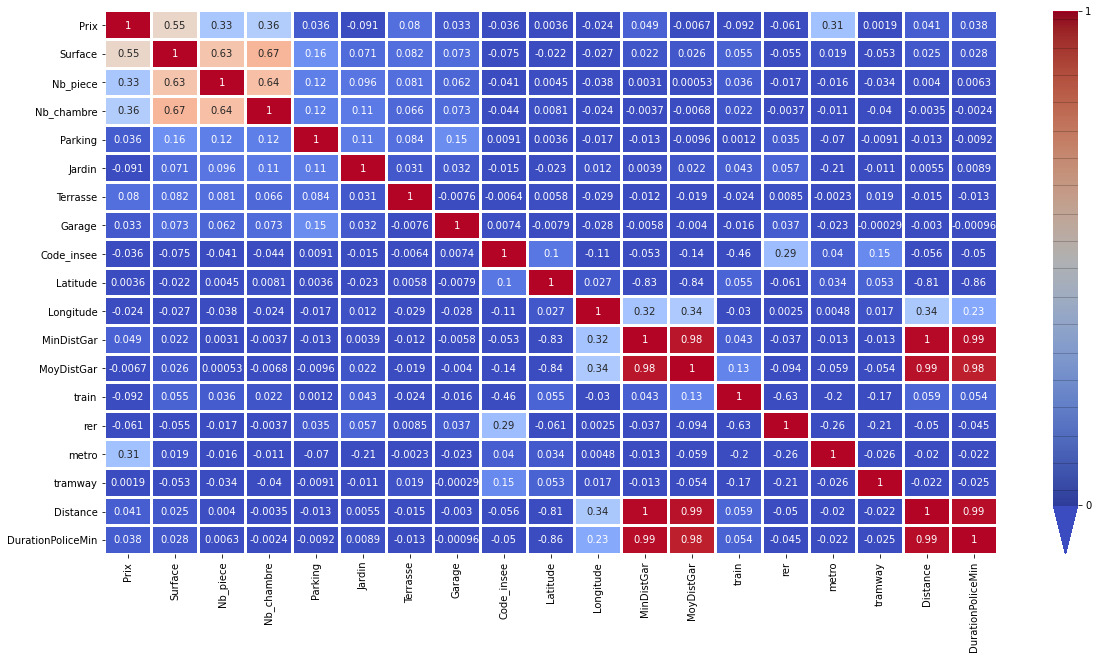

In [145]:
plt.figure(figsize=(20,10))
cbar_kws = {"orientation":"vertical", "shrink":1,'extend':'min', 
            'extendfrac':0.1, "ticks":np.arange(0,22), "drawedges":True} # 
hm = sns.heatmap(
    donnee.corr(),
    vmin=0,vmax=1, cmap="coolwarm", annot = True,
    linewidth = 2, cbar_kws=cbar_kws )
plt.show()

### b. Réduction de dimensions et clustering

In [146]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram,linkage
import prince #import PCA


In [159]:
donnee.head()

,id_hourse,Addresse,Titre,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Terrasse,...,train,rer,metro,tramway,Distance,DurationPoliceMin,DepartPrecis,Departement,Zone,Emplacement
0,PA75_0,Paris 13e 75013 (Butte-aux-Cailles),"Achat maison 5 pièces 133 m², Paris 13e - 1 69...",1695000.0,133.00,5,4,0,0,0,...,0,0,1,0,0.868479,0.069722,75013,75,Paris e (Butte-aux-Cailles),Butte-aux-Cailles
1,PA75_1,Paris 19e 75019 (Secrétan - Jaurès),"Achat maison 3 pièces 47 m², Paris 19e - 577 5...",577500.0,47.03,3,1,0,0,0,...,0,0,1,0,1.113978,0.096667,75019,75,Paris e (Secrétan - Jaurès),Secrétan - Jaurès
2,PA75_3,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1263000.0,150.00,6,4,0,0,1,...,0,0,1,1,1.459752,0.169167,75019,75,Paris e (Porte de la Villette),Porte de la Villette
3,PA75_4,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1263000.0,150.00,6,4,0,0,1,...,0,0,1,1,1.459752,0.169167,75019,75,Paris e (Porte de la Villette),Porte de la Villette
4,PA75_5,Paris 19e 75019 (Porte de la Villette),"Achat maison 6 pièces 150 m², Paris 19e - 1 26...",1263000.0,150.00,6,4,0,0,1,...,0,0,1,1,1.459752,0.169167,75019,75,Paris e (Porte de la Villette),Porte de la Villette


In [147]:
donnee.columns

Index(['id_hourse', 'Addresse', 'Titre', 'Prix', 'Surface', 'Nb_piece',
       'Nb_chambre', 'Parking', 'Jardin', 'Terrasse', 'Garage',
       'Date_publication', 'Date_modification', 'Titre_description',
       'Description', 'Code_insee', 'Latitude', 'Longitude', 'MinDistGar',
       'MoyDistGar', 'train', 'rer', 'metro', 'tramway', 'Distance',
       'DurationPoliceMin', 'DepartPrecis', 'Departement', 'Zone',
       'Emplacement'],
      dtype='object')

In [245]:
X=donnee[["Prix", "Surface" ,"Nb_piece","Nb_chambre","Parking","Terrasse","Garage"]]

In [246]:
pca = prince.PCA(
     n_components=10,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42 )
pca = pca.fit(X)

In [247]:
pca.eigenvalues_

array([2.67429894, 1.12537662, 1.0021361 , 0.83148249, 0.72639027,
       0.36210999, 0.27820559])

In [248]:
pca.explained_inertia_

array([0.38204271, 0.16076809, 0.1431623 , 0.11878321, 0.10377004,
       0.05173   , 0.03974366])

In [249]:
np.array([1,2,3,4,5])

array([1, 2, 3, 4, 5])

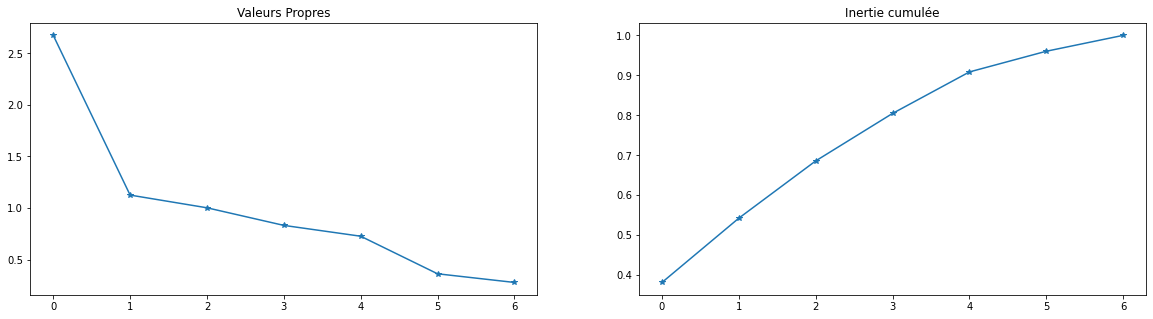

In [250]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.plot(pca.eigenvalues_,marker='*')
plt.title('Valeurs Propres')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_inertia_),marker='*')
plt.title('Inertie cumulée')

plt.show()

 **`Le critère du coude suggère 3 variables, de Kaiser 4 variables. Ajouté à l'Inertie cumulée on retient 5 variables. Donc nos variables peuvent ètre regroupées en 5 groupes de variables.`**

In [251]:
pca = prince.PCA(
     n_components=4,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42 )
pca = pca.fit(X)

In [252]:
resPCA=pca.transform(X)

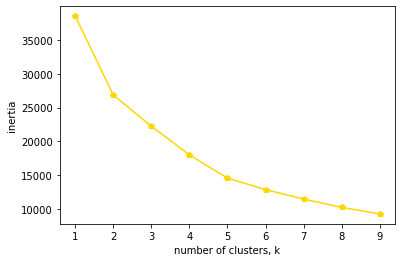

In [253]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(resPCA.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks(ks)
plt.show()

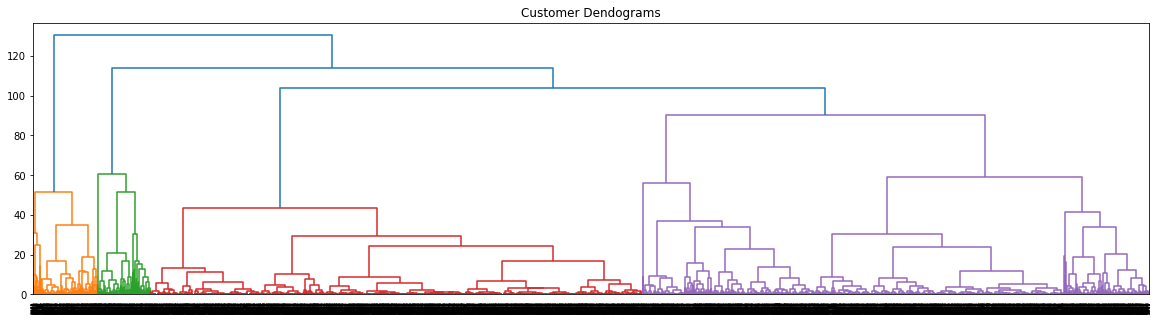

In [254]:
plt.figure(figsize=(20, 5))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(resPCA, method='ward'))

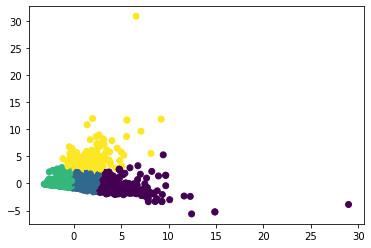

In [255]:
model = KMeans(n_clusters=4)
model.fit(resPCA.iloc[:,:2])
labels = model.predict(resPCA.iloc[:,:2])
plt.scatter(resPCA[0], resPCA[1], c=labels)
plt.show()

**`Le critère du coude suggère 2 ou 5 clusters. Mais la méthode de "WARD" nous suggère 4 Clusters. Nous prendrons pour la suite 4 clusters de maisons dans l'Ile de France. `**

In [242]:
resKM=KMeans(n_clusters=4)
resKM.fit(resPCA)

KMeans(n_clusters=4)

In [243]:
Kmdata=pd.DataFrame({'Cluster':resKM.labels_,'Prix':donnee.Prix,'Surface':donnee.Surface,'NbPieces':donnee.Nb_piece})

In [244]:
Kmdata.groupby(Kmdata.Cluster).mean().round()

,Prix,Surface,NbPieces
Cluster,,,
0,425415.0,115.0,5.0
1,1053579.0,250.0,9.0
2,2884000.0,282.0,6.0
3,638234.0,185.0,7.0


- **` Le Cluster 0  est celui des petites maisons, de 5 pièces, de 99m² avec un prix de 371.337 € en moyenne. `**
- **` Le Cluster 3  est celui des grandes maisons, de 11 pièces, de 372m² avec un prix de 1.864.811 € en moyenne. `**

# 3. Modelisation 

In [265]:
# Packages
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,BayesianRidge,ElasticNet,LassoLarsIC # OLS algorithm
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor  # ElasticNet algorithm

from termcolor import colored as cl # text customization
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
Index(['id_hourse', 'Addresse', 'Titre', 'Prix', 'Surface', 'Nb_piece',
       'Nb_chambre', 'Parking', 'Jardin', 'Terrasse', 'Garage',
       'Date_publication', 'Date_modification', 'Titre_description',
       'Description', 'Code_insee', 'Latitude', 'Longitude', 'MinDistGar',
       'MoyDistGar', 'train', 'rer', 'metro', 'tramway', 'Distance',
       'DurationPoliceMin', 'DepartPrecis', 'Departement', 'Zone',
       'Emplacement'],
      dtype='object')

## 3.1 Préparation des données

In [290]:
subsetdata=donnee[['Prix', 'Surface', 'Nb_piece','Nb_chambre', 'Parking', 'Jardin', 'Terrasse', 'Garage',"Departement",'Latitude', 'Longitude', 'MinDistGar',
       'MoyDistGar', 'train', 'rer', 'metro', 'tramway', 'Distance',
       'DurationPoliceMin']]
subsetdata

,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Terrasse,Garage,Departement,Latitude,Longitude,MinDistGar,MoyDistGar,train,rer,metro,tramway,Distance,DurationPoliceMin
0,1695000.0,133.00,5,4,0,0,0,0,75,48.825972,2.350785,0.425565,19.095682,0,0,1,0,0.868479,0.069722
1,577500.0,47.03,3,1,0,0,0,0,75,48.882067,2.371419,0.120858,18.978874,0,0,1,0,1.113978,0.096667
2,1263000.0,150.00,6,4,0,0,1,0,75,48.897404,2.385591,0.006254,19.686612,0,0,1,1,1.459752,0.169167
3,1263000.0,150.00,6,4,0,0,1,0,75,48.897404,2.385591,0.006254,19.686612,0,0,1,1,1.459752,0.169167
4,1263000.0,150.00,6,4,0,0,1,0,75,48.897404,2.385591,0.006254,19.686612,0,0,1,1,1.459752,0.169167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,284000.0,76.00,5,3,0,1,0,0,95,49.032317,2.473363,0.354848,30.452523,0,1,0,0,1.573348,0.066944
8363,202000.0,60.00,3,2,0,1,0,0,95,49.063250,1.702780,8.201495,56.235299,1,0,0,0,24.035142,0.591111
8365,209500.0,100.02,5,2,5,1,0,0,95,49.052753,2.038874,0.480975,37.439721,1,1,0,0,3.735724,0.127500
8366,253000.0,100.00,5,4,1,0,0,1,95,49.098665,2.516200,0.689148,37.166498,0,1,0,0,8.954398,0.330000


In [291]:
dum=pd.get_dummies(donnee.Departement)
subsetdata[dum.columns]=dum
subsetdata.drop(columns="Departement",inplace=True)

C:\Users\ALI ZATCHI Afzal\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\ALI ZATCHI Afzal\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [294]:
subsetdata

,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Terrasse,Garage,Latitude,Longitude,...,Distance,DurationPoliceMin,75,77,78,91,92,93,94,95
0,1695000.0,133.00,5,4,0,0,0,0,48.825972,2.350785,...,0.868479,0.069722,1,0,0,0,0,0,0,0
1,577500.0,47.03,3,1,0,0,0,0,48.882067,2.371419,...,1.113978,0.096667,1,0,0,0,0,0,0,0
2,1263000.0,150.00,6,4,0,0,1,0,48.897404,2.385591,...,1.459752,0.169167,1,0,0,0,0,0,0,0
3,1263000.0,150.00,6,4,0,0,1,0,48.897404,2.385591,...,1.459752,0.169167,1,0,0,0,0,0,0,0
4,1263000.0,150.00,6,4,0,0,1,0,48.897404,2.385591,...,1.459752,0.169167,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,284000.0,76.00,5,3,0,1,0,0,49.032317,2.473363,...,1.573348,0.066944,0,0,0,0,0,0,0,1
8363,202000.0,60.00,3,2,0,1,0,0,49.063250,1.702780,...,24.035142,0.591111,0,0,0,0,0,0,0,1
8365,209500.0,100.02,5,2,5,1,0,0,49.052753,2.038874,...,3.735724,0.127500,0,0,0,0,0,0,0,1
8366,253000.0,100.00,5,4,1,0,0,1,49.098665,2.516200,...,8.954398,0.330000,0,0,0,0,0,0,0,1


## 3.2 Features Selection

In [295]:
subsetdata.columns

Index(['Prix', 'Surface', 'Nb_piece', 'Nb_chambre', 'Parking', 'Jardin',
       'Terrasse', 'Garage', 'Latitude', 'Longitude', 'MinDistGar',
       'MoyDistGar', 'train', 'rer', 'metro', 'tramway', 'Distance',
       'DurationPoliceMin', '75', '77', '78', '91', '92', '93', '94', '95'],
      dtype='object')

In [296]:
scaler = StandardScaler()

In [297]:
scaler.fit(subsetdata)
df_scaled = scaler.transform(subsetdata)
column_names = subsetdata.columns[subsetdata.columns != "Prix"]

X = df_scaled[:, subsetdata.columns != "Prix"]
y = subsetdata["Prix"].copy()
y = y.values.ravel()

In [298]:
X = subsetdata[['Surface', 'Nb_piece', 'Nb_chambre', 'Parking', 'Jardin',
       'Terrasse', 'Garage', 'Latitude', 'Longitude', 'MinDistGar',
       'MoyDistGar', 'train', 'rer', 'metro', 'tramway', 'Distance',
       'DurationPoliceMin', '75', '77', '78', '91', '92', '94', '95', '93']]
y = subsetdata["Prix"].copy()
y = y.values.ravel()

In [299]:

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

pd.isnull(ytrain).sum()

lasso_ = Lasso(fit_intercept=True)

lasso_.fit(xtrain, ytrain)

lasso_.coef_

column_names[lasso_.coef_ != 0]

C:\Users\ALI ZATCHI Afzal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379579829609729.4, tolerance: 179552222975.68326
  positive)


Index(['Surface', 'Nb_piece', 'Nb_chambre', 'Parking', 'Jardin', 'Terrasse',
       'Garage', 'Latitude', 'Longitude', 'MinDistGar', 'MoyDistGar', 'train',
       'rer', 'metro', 'tramway', 'Distance', 'DurationPoliceMin', '75', '77',
       '78', '91', '92', '93', '94', '95'],
      dtype='object')

In [300]:
lasso_.coef_

array([ 3.70551472e+03,  9.78616195e+01, -1.08393902e+04, -5.09925152e+03,
       -3.62759041e+04,  1.59889223e+04,  9.88296033e+03, -1.54238264e+05,
        6.64208526e+04,  6.70308930e+03, -1.01614797e+04, -1.45592965e+04,
       -9.14439890e+03,  2.33855600e+05, -6.76153802e+04,  4.09653567e+03,
       -1.02720817e+05,  1.27889763e+06, -4.45256602e+04,  1.21037744e+05,
       -1.03050618e+05,  4.29898498e+05,  1.99831388e+04, -3.16367210e+04,
       -8.03936267e+04])

Conclusion: Toutes les variables sont séléctionnées

## 3.3 Premier modèle 

Dans cette partie nous prenons comme variable cible le Logarithme edu prix qui est plus proche d'une normale que le prix lui meme.

In [331]:
X = subsetdata[['Surface', 'Nb_piece', 'Nb_chambre', 'Parking', 'Jardin', 'Terrasse',
       'Garage', 'Latitude', 'Longitude', 'MinDistGar', 'MoyDistGar', 'train',
       'rer', 'metro', 'tramway', 'Distance', 'DurationPoliceMin', '75', '77',
       '78', '91', '92', '93', '94', '95']]
y = subsetdata["Prix"].copy()
y = y.values.ravel()

In [332]:
xtrain, xtest, ytrain, ytest = train_test_split(X, np.log(y), test_size=0.2,random_state=2022) #2022

In [333]:
# MODELING

# 1. OLS
ols = LinearRegression()
ols.fit(xtrain, ytrain)
ols_yhat = ols.predict(xtest)

# 2. Ridge
ridge = Ridge(alpha = 0.01)
ridge.fit(xtrain, ytrain)
ridge_yhat = ridge.predict(xtest)

# 3. Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(xtrain, ytrain)
lasso_yhat = lasso.predict(xtest)

# 4. Bayesian
bayesian = BayesianRidge()
bayesian.fit(xtrain, ytrain)
bayesian_yhat = bayesian.predict(xtest)

# 5. ElasticNet
en = ElasticNet(alpha = 0.01)
en.fit(xtrain, ytrain)
en_yhat = en.predict(xtest)

# 6.GradientBoosting
gb=GradientBoostingRegressor()
gb.fit(xtrain, ytrain)
gb_yhat = gb.predict(xtest)

# 7.RandomForestRegressor
rd=RandomForestRegressor()
rd.fit(xtrain, ytrain)
rd_yhat = rd.predict(xtest)

C:\Users\ALI ZATCHI Afzal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2471220246229677, tolerance: 0.24136365523328987
  positive)
C:\Users\ALI ZATCHI Afzal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.831964955162903, tolerance: 0.24136365523328987
  positive)


In [334]:
round(r2(ytrain, ridge.predict(xtrain)),3)

0.742

In [335]:
# . R-SQUARED :
print(cl('R-Squared VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(round(r2(ytest, ols_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(round(r2(ytest, ridge_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(round(r2(ytest, lasso_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(round(r2(ytest, bayesian_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(round(r2(ytest, en_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of GradientBoosting is {}'.format(round(r2(ytest, gb_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of RandomForest is {}'.format(round(r2(ytest, rd_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-Squared VARIANCE SCORE:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.742
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.742
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.706
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.742
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.726
-------------------------------------------------------------------------------
R-Squared of GradientBoosting is 0.823
-------------------------------------------------------------------------------
R-Squared of RandomForest is 0.843
-------------------------------------------------------------------------------


In [336]:
res=pd.DataFrame({"Modele":["OLS","Ridge","Lasso","Bayesian","ElasticNet","GradientBoosting","RandomForest"],
    "R-SQUARED":[r2(ytest, ols_yhat),r2(ytest, ridge_yhat),r2(ytest, lasso_yhat),
            r2(ytest, bayesian_yhat),r2(ytest,en_yhat),r2(ytest, gb_yhat),r2(ytest, rd_yhat)]}
                )

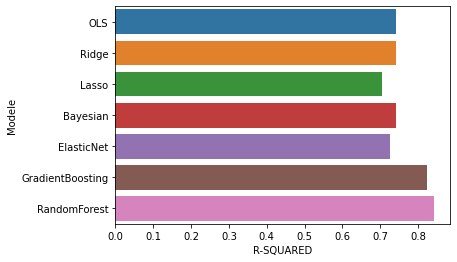

In [337]:
sns.barplot(y="Modele",x="R-SQUARED",data=res)

- **`Les R-Squared des modèles convergent presque vers la meme valeur. Toutefois, c'est le Random Forest qui performent le mieux.- `**

- **`Environ 84,5% de l'information sur le prix de la maison peut etre expliquer par notre modèle. 
Ce qui n'est déja pas mal, vu le très petit nombre de variables dont nous disposons. `**


In [338]:
### Prédictions

In [339]:
def pred_gb_df(xtest,ytest):
    p=rd.predict(xtest)
    return(pd.DataFrame({"Values":np.exp(ytest),"Predictions":np.exp(p)}).round())
pred_gb_df(xtest,ytest)

,Values,Predictions
0,352000.0,346237.0
1,1195000.0,1045172.0
2,890000.0,766486.0
3,400000.0,239618.0
4,187500.0,232038.0
...,...,...
1600,325000.0,324766.0
1601,251500.0,293292.0
1602,695000.0,1065941.0
1603,334000.0,311857.0


## 3.4 Deuxième modèle: Sur  données normalisées

In [343]:
subsetdata.columns[subsetdata.columns!="Prix"]

Index(['Surface', 'Nb_piece', 'Nb_chambre', 'Parking', 'Jardin', 'Terrasse',
       'Garage', 'Latitude', 'Longitude', 'MinDistGar', 'MoyDistGar', 'train',
       'rer', 'metro', 'tramway', 'Distance', 'DurationPoliceMin', '75', '77',
       '78', '91', '92', '93', '94', '95'],
      dtype='object')

In [350]:
### 
df_=subsetdata#[subsetdata.columns[subsetdata.columns!="Prix"]]
scaler.fit(df_)
df_scaled = scaler.transform(df_)

In [351]:
df_scaled=pd.DataFrame(df_scaled,columns=subsetdata.columns)

In [353]:
column_names = df_scaled.columns[df_scaled.columns != "Prix"]
X = df_scaled[column_names]
y = df_scaled["Prix"].copy()
y = y.values.ravel()

In [354]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=2022)

In [355]:
# MODELING

# 1. OLS
ols = LinearRegression()
ols.fit(xtrain, ytrain)
ols_yhat = ols.predict(xtest)

# 2. Ridge
ridge = Ridge(alpha = 0.01)
ridge.fit(xtrain, ytrain)
ridge_yhat = ridge.predict(xtest)

# 3. Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(xtrain, ytrain)
lasso_yhat = lasso.predict(xtest)

# 4. Bayesian
bayesian = BayesianRidge()
bayesian.fit(xtrain, ytrain)
bayesian_yhat = bayesian.predict(xtest)

# 5. ElasticNet
en = ElasticNet(alpha = 0.01)
en.fit(xtrain, ytrain)
en_yhat = en.predict(xtest)

# 6.GradientBoosting
gb=GradientBoostingRegressor()
gb.fit(xtrain, ytrain)
gb_yhat = gb.predict(xtest)

# 7.RandomForestRegressor
rd=RandomForestRegressor()
rd.fit(xtrain, ytrain)
rd_yhat = rd.predict(xtest)

In [356]:
# . R-SQUARED :
print(cl('R-Squared :', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(round(r2(ytest, ols_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(round(r2(ytest, ridge_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(round(r2(ytest, lasso_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(round(r2(ytest, bayesian_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(round(r2(ytest, en_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of GradientBoosting is {}'.format(round(r2(ytest, gb_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of RandomForest is {}'.format(round(r2(ytest, rd_yhat),3)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-Squared :
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.589
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.589
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.578
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.589
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.584
-------------------------------------------------------------------------------
R-Squared of GradientBoosting is 0.856
-------------------------------------------------------------------------------
R-Squared of RandomForest is 0.873
-------------------------------------------------------------------------------


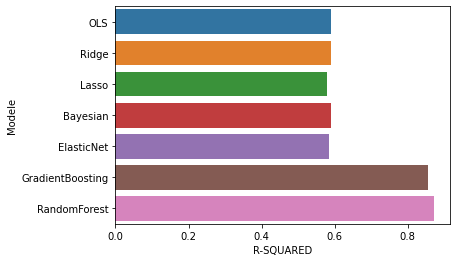

In [357]:
resN=pd.DataFrame({"Modele":["OLS","Ridge","Lasso","Bayesian","ElasticNet","GradientBoosting","RandomForest"],
    "R-SQUARED":[r2(ytest, ols_yhat),r2(ytest, ridge_yhat),r2(ytest, lasso_yhat),
            r2(ytest, bayesian_yhat),r2(ytest,en_yhat),r2(ytest, gb_yhat),r2(ytest, rd_yhat)]}
                )
sns.barplot(y="Modele",x="R-SQUARED",data=resN)

In [358]:
def pred_rd_df(xtest,ytest):
    mu=subsetdata.Prix.mean()
    sigma=subsetdata.Prix.std()
    p=rd.predict(xtest)
    p=p*sigma+mu
    return(pd.DataFrame({"Values":ytest*sigma+mu,"Predictions":p}).round())
pred_rd_df(xtest,ytest)

,Values,Predictions
0,351986.0,371852.0
1,1195039.0,1046890.0
2,890020.0,764334.0
3,399989.0,258290.0
4,187476.0,236234.0
...,...,...
1600,324985.0,311310.0
1601,251480.0,293677.0
1602,695008.0,1178536.0
1603,333985.0,311234.0


**` La normalisation améliore légèrement la performance des deux algorithme que performent le mieux sur nos données. 
Le Random Forest passe d'un R-Squared de 84,5% à 87,3% `**

# 4. Classification des Images par transfert learning

# 5. Récapitulatif ( Peut etre)

# 6. Conclusion

# 7. Bibliographie